In [2]:
import pandas as pd

OUT_CSV = '../eye-gaze-capture.csv'

capture_df = pd.read_csv(OUT_CSV)

# Only deal with frames where face and eyes were detected
capture_df = capture_df[capture_df['appleFace.IsValid'] == True]

In [3]:
capture_df.Dataset.value_counts()

train    1904775
test      268332
val        84901
Name: Dataset, dtype: int64

In [4]:
train_df = capture_df[capture_df['Dataset'] == 'train']
test_df = capture_df[capture_df['Dataset'] == 'test']
val_df = capture_df[capture_df['Dataset'] == 'val']

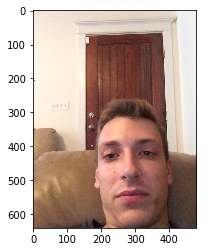

In [7]:
from toolz import curry
from funcy import compose, partial
from os.path import join, expanduser
import matplotlib as mpl
import matplotlib.pyplot as plt

FOLDER_DIR = '~/Documents/data/gazecapture'

@curry
def col(key, row):
    return row[key]

from_dir = partial(join, expanduser(FOLDER_DIR))

frame = compose(plt.imread, from_dir, col('Frame'))

sample_image = frame(train_df.iloc[10000])

plt.imshow(sample_image)
plt.show()

In [8]:
import face_alignment
from mpl_toolkits.mplot3d import Axes3D
from skimage import io

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, enable_cuda=True, flip_input=False)

/home/rcdilorenzo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


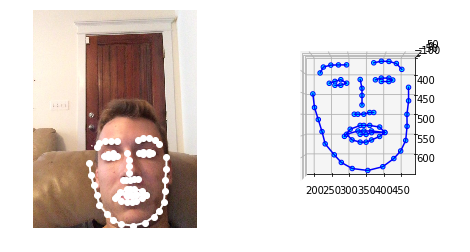

In [12]:
preds = fa.get_landmarks(sample_image)[-1]

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(sample_image)
ax.plot(preds[0:17,0],preds[0:17,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[17:22,0],preds[17:22,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[22:27,0],preds[22:27,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[27:31,0],preds[27:31,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[31:36,0],preds[31:36,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[36:42,0],preds[36:42,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[42:48,0],preds[42:48,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[48:60,0],preds[48:60,1],marker='o',markersize=6,linestyle='-',color='w',lw=2)
ax.plot(preds[60:68,0],preds[60:68,1],marker='o',markersize=6,linestyle='-',color='w',lw=2) 
ax.axis('off')

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:,0]*1.2,preds[:,1],preds[:,2],c="cyan", alpha=1.0, edgecolor='b')
ax.plot3D(preds[:17,0]*1.2,preds[:17,1], preds[:17,2], color='blue' )
ax.plot3D(preds[17:22,0]*1.2,preds[17:22,1],preds[17:22,2], color='blue')
ax.plot3D(preds[22:27,0]*1.2,preds[22:27,1],preds[22:27,2], color='blue')
ax.plot3D(preds[27:31,0]*1.2,preds[27:31,1],preds[27:31,2], color='blue')
ax.plot3D(preds[31:36,0]*1.2,preds[31:36,1],preds[31:36,2], color='blue')
ax.plot3D(preds[36:42,0]*1.2,preds[36:42,1],preds[36:42,2], color='blue')
ax.plot3D(preds[42:48,0]*1.2,preds[42:48,1],preds[42:48,2], color='blue')
ax.plot3D(preds[48:,0]*1.2,preds[48:,1],preds[48:,2], color='blue' )

ax.view_init(elev=90., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

In [10]:
preds

array([[ 165.       ,  449.       ,  -89.98794  ],
       [ 169.       ,  483.       ,  -87.766525 ],
       [ 178.       ,  513.       ,  -86.68859  ],
       [ 187.       ,  543.       ,  -82.60174  ],
       [ 195.       ,  573.       ,  -68.7298   ],
       [ 217.       ,  599.       ,  -44.358273 ],
       [ 234.       ,  616.       ,  -15.748064 ],
       [ 259.       ,  629.       ,    9.665279 ],
       [ 294.       ,  633.       ,   19.628586 ],
       [ 328.       ,  625.       ,    4.5734777],
       [ 354.       ,  607.       ,  -23.631054 ],
       [ 371.       ,  590.       ,  -53.54083  ],
       [ 384.       ,  565.       ,  -79.118416 ],
       [ 388.       ,  530.       ,  -93.5041   ],
       [ 388.       ,  500.       ,  -98.26589  ],
       [ 392.       ,  466.       , -100.67712  ],
       [ 392.       ,  432.       , -103.0584   ],
       [ 187.       ,  402.       ,   13.3158655],
       [ 195.       ,  389.       ,   28.932598 ],
       [ 212.       ,  385.    